In [4]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import seaborn
import numpy
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('./train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<h5>Tạo tập dữ liệu để Train</h5>


In [6]:
Data_Train=data[['LotArea', 'YearBuilt','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd','SalePrice']]
Data_Train.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,8450,2003,856,854,2,3,8,208500
1,9600,1976,1262,0,2,3,6,181500
2,11250,2001,920,866,2,3,6,223500
3,9550,1915,961,756,1,3,7,140000
4,14260,2000,1145,1053,2,4,9,250000


<h5>Kiểm Tra dữ liệu thiếu</h5>

In [7]:
Data_Train.isna().sum()

LotArea         0
YearBuilt       0
1stFlrSF        0
2ndFlrSF        0
FullBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64

In [8]:
Data_Train.describe().round(2)

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,10516.83,1971.27,1162.63,346.99,1.57,2.87,6.52,180921.2
std,9981.26,30.20,386.59,436.53,0.55,0.82,1.63,79442.5
min,1300.00,1872.00,334.00,0.00,0.00,0.00,2.00,34900.0
25%,7553.50,1954.00,882.00,0.00,1.00,2.00,5.00,129975.0
50%,9478.50,1973.00,1087.00,0.00,2.00,3.00,6.00,163000.0
75%,11601.50,2000.00,1391.25,728.00,2.00,3.00,7.00,214000.0
max,215245.00,2010.00,4692.00,2065.00,3.00,8.00,14.00,755000.0


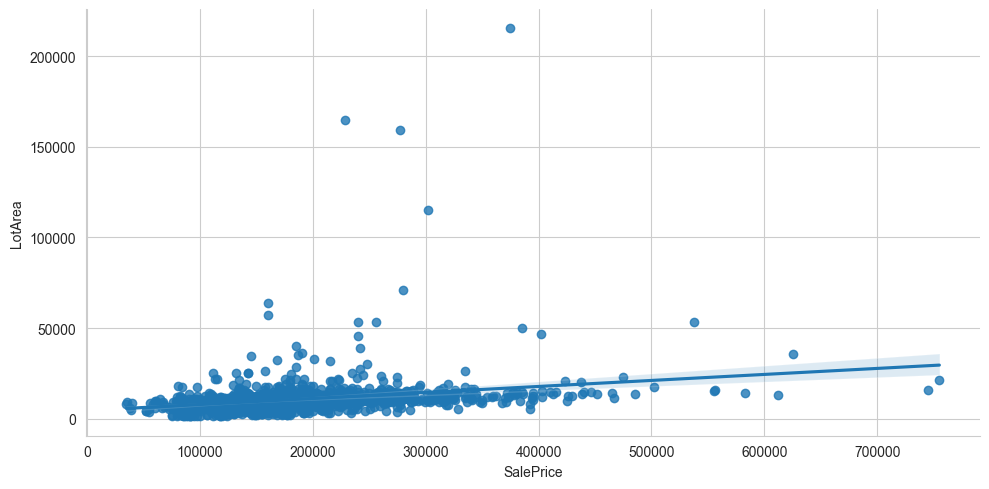

In [9]:
seaborn.lmplot(x = 'SalePrice', y = 'LotArea', data = Data_Train, aspect=2, height=5)
plt.show()

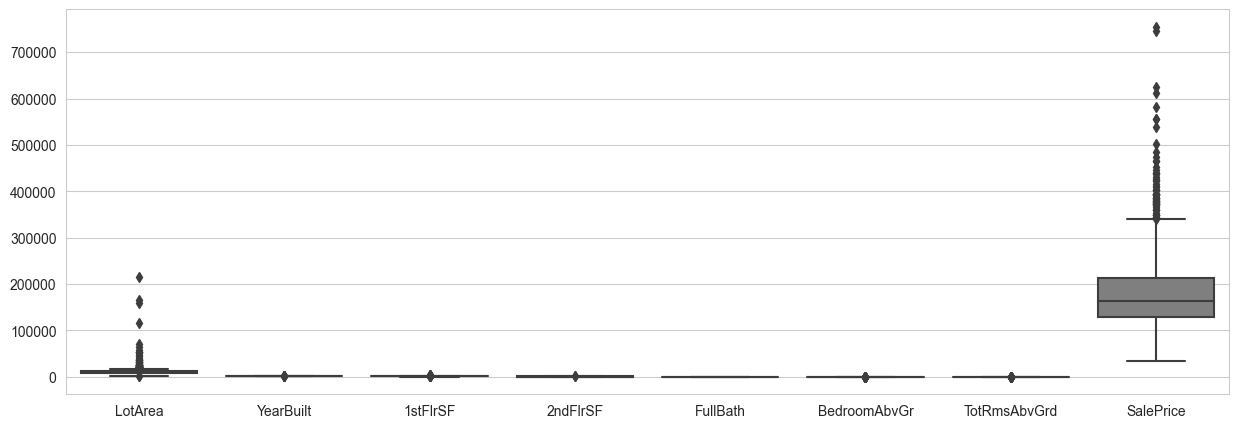

In [10]:
plt.figure(figsize=(15, 5))
seaborn.boxplot(Data_Train)
plt.show()

In [11]:
def find_outliers_IQR(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
    return outliers

<h5>Tìm Outlier cho SalePrice</h5>


In [12]:
sale_price_outliers = find_outliers_IQR(Data_Train['SalePrice'])
sale_price_outliers.count()

61

In [13]:
cut_labels = ['Low','Medium','High','Outliers']
cut_bins = [0,150000,300000,500000, Data_Train['SalePrice'].max()]
Data_Train_copy = Data_Train.copy()
Data_Train_copy['SalePriceLable'] = pd.cut(Data_Train_copy['SalePrice'], bins=cut_bins, labels=cut_labels)

In [14]:
Data_Train_copy

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice,SalePriceLable
0,8450,2003,856,854,2,3,8,208500,Medium
1,9600,1976,1262,0,2,3,6,181500,Medium
2,11250,2001,920,866,2,3,6,223500,Medium
3,9550,1915,961,756,1,3,7,140000,Low
4,14260,2000,1145,1053,2,4,9,250000,Medium
...,...,...,...,...,...,...,...,...,...
1455,7917,1999,953,694,2,3,7,175000,Medium
1456,13175,1978,2073,0,2,3,7,210000,Medium
1457,9042,1941,1188,1152,2,4,9,266500,Medium
1458,9717,1950,1078,0,1,2,5,142125,Low


In [15]:
print(Data_Train_copy['SalePriceLable'][(Data_Train_copy['SalePriceLable'] == 'Low')].count())
print(Data_Train_copy['SalePriceLable'][(Data_Train_copy['SalePriceLable'] == 'Medium')].count())
print(Data_Train_copy['SalePriceLable'][(Data_Train_copy['SalePriceLable'] == 'High')].count())
print(Data_Train_copy['SalePriceLable'][(Data_Train_copy['SalePriceLable'] == 'Outliers')].count())

619
726
106
9


<h5>Xây dựng mô hình</h5>


In [16]:
y = Data_Train_copy['SalePriceLable']
X = Data_Train_copy[["LotArea" ,"YearBuilt" ,"1stFlrSF" ,"2ndFlrSF" ,"FullBath" ,"BedroomAbvGr" ,"TotRmsAbvGrd"]]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

In [18]:
print('Số giá trị trong từng bộ dữ liệu')
print('X_train: ', numpy.shape(X_train))
print('y_train: ', numpy.shape(y_train))
print('X_test: ', numpy.shape(X_test))
print('y_test: ', numpy.shape(y_test))

Số giá trị trong từng bộ dữ liệu
X_train:  (1168, 7)
y_train:  (1168,)
X_test:  (292, 7)
y_test:  (292,)


In [19]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
predicts = model.predict(X_test)
print(predicts[:5])
print(y_test[:5])

['Medium' 'Low' 'Low' 'Low' 'Medium']
258     Medium
267     Medium
288        Low
649        Low
1233       Low
Name: SalePriceLable, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Outliers']


<h5>Đánh giá mô hình</h5>


In [21]:
print(accuracy_score(y_test, predicts))
print(confusion_matrix(y_test, predicts))
print(classification_report(y_test, predicts))

0.8458904109589042
[[  8   0  13   0]
 [  0 124   9   0]
 [  7  16 113   0]
 [  0   0   0   2]]
              precision    recall  f1-score   support

        High       0.53      0.38      0.44        21
         Low       0.89      0.93      0.91       133
      Medium       0.84      0.83      0.83       136
    Outliers       1.00      1.00      1.00         2

    accuracy                           0.85       292
   macro avg       0.81      0.79      0.80       292
weighted avg       0.84      0.85      0.84       292



<h5>So sanh kết quả với thực tế</h5>


In [22]:
SalePrice_test = pd.DataFrame(y_test)
SalePrice_test.reset_index(drop=True, inplace=True)
SalePrice_test.head()

,SalePriceLable
0,Medium
1,Medium
2,Low
3,Low
4,Low


In [23]:
SalePrice_predicted = pd.DataFrame(predicts, columns=['Predicted SalePrice'])
SalePrice_predicted.head()

,Predicted SalePrice
0,Medium
1,Low
2,Low
3,Low
4,Medium


In [24]:
SalePrice_comparing = pd.concat([SalePrice_test, SalePrice_predicted], axis=1)
SalePrice_comparing

,SalePriceLable,Predicted SalePrice
0,Medium,Medium
1,Medium,Low
2,Low,Low
3,Low,Low
4,Low,Medium
...,...,...
287,Low,Low
288,Medium,Medium
289,Low,Low
290,Low,Low


In [25]:
accuracy = accuracy_score(y_test, predicts)
print("Accuracy:", accuracy)

Accuracy: 0.8458904109589042
